In [1]:
from __future__ import print_function, division

# %matplotlib inline
# %precision 3

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from marriages_replication import *

# from matplotlib import rc
# rc('animation', html='html5')

In [2]:
def runSimBi(agents_per_race, races, prob_intra, prob_inter):
    agents = agents_per_race*races
    genders=getGender(agents_per_race,races)
    social_beliefs, political_beliefs = createPersonality(agents_per_race, races)
    adj, adj2, adj3 = createAdj(agents_per_race, races, prob_inter=prob_inter, prob_intra=prob_intra)
    distances = getPersonalityDistances(agents, adj, genders, social_beliefs, political_beliefs, bisexuals=True)
    marriage, distances = createMarriages(agents, distances,genders)
    avg_dist = averageDistances(distances, marriage)
    num_intra = numIntraracial(marriage, agents_per_race, races)
    num_inter = numInterracial(num_intra, marriage)
    diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
    return diversity,percent_married,compatibility

[ 0.          0.07142857  0.14285714  0.21428571  0.28571429  0.35714286
  0.42857143  0.5         0.57142857  0.64285714  0.71428571  0.78571429
  0.85714286  0.92857143  1.        ]


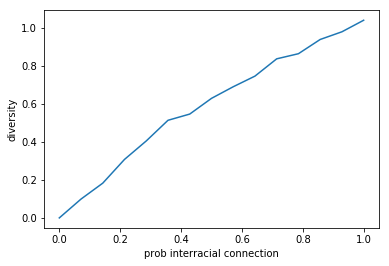

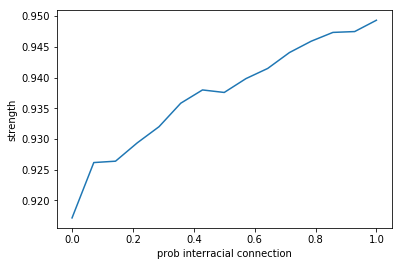

In [3]:

probabilities = np.linspace(0.0, 1.0, num=15, dtype=float)
num_sims = 30
print(probabilities)

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = runSimBi(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plt.figure()
plt.plot(probabilities, diversities, label='diversities')
plt.xlabel("prob interracial connection")
plt.ylabel('diversity')
plt.savefig("reports/img/bisexual_div.png")
plt.figure()
plt.plot(probabilities, strengths, label='strengths')
plt.xlabel("prob interracial connection")
plt.ylabel('strength')
plt.savefig("reports/img/bisexual_str.png")
plt.show()

In [4]:
def runSimDiffGenderTraits(agents_per_race, races, prob_intra, prob_inter, mean_w, mean_m):
    agents = agents_per_race*races
    genders=getGender(agents_per_race,races)
    social_beliefs, political_beliefs = createPersonality(
        agents_per_race, races, gender_matrix=genders, mean_w=mean_w, mean_m=mean_m)
    adj, adj2, adj3 = createAdj(agents_per_race, races, prob_inter=prob_inter, prob_intra=prob_intra)
    distances = getPersonalityDistances(agents, adj, genders, social_beliefs, political_beliefs, bisexuals=True)
    marriage, distances = createMarriages(agents, distances,genders)
    avg_dist = averageDistances(distances, marriage)
    num_intra = numIntraracial(marriage, agents_per_race, races)
    num_inter = numInterracial(num_intra, marriage)
    diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
    mw, mm, ww = genderRatios(marriage, agents, genders)
    return diversity,percent_married,compatibility, mw, mm, ww

In [5]:
runSimDiffGenderTraits(50, 2, 1.0, 0.4, 0.25, 0.75)

(0.69387755102040816, 0.97999999999999998, 0.96187300142998311, 2, 50, 48)

[ 0.          0.03571429  0.07142857  0.10714286  0.14285714  0.17857143
  0.21428571  0.25        0.28571429  0.32142857  0.35714286  0.39285714
  0.42857143  0.46428571  0.5       ]


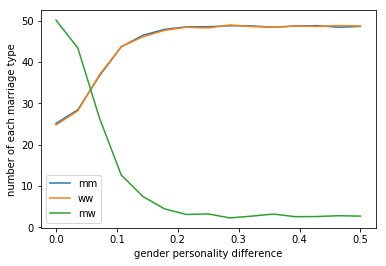

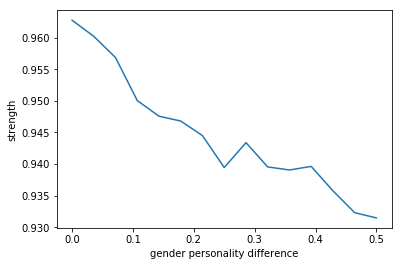

In [6]:
probabilities = np.linspace(0.0, 0.5, num=15, dtype=float)
num_sims = 30
print(probabilities)

mms = []
wws = []
mws = []
strengths = []

connection_prob = 0.4

for diff in probabilities:
    mm_sum = 0
    ww_sum = 0
    mw_sum = 0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength, mw, mm, ww = runSimDiffGenderTraits(50, 2, connection_prob, connection_prob, 0.5-diff, 0.5+diff)
        mm_sum += mm
        ww_sum += ww
        mw_sum += mw
        str_sum += strength
    mms.append(mm_sum/num_sims)
    wws.append(ww_sum/num_sims)
    mws.append(mw_sum/num_sims)
    strengths.append(str_sum/num_sims)

mm_lab, = plt.plot(probabilities, mms, label='mm')
ww_lab, = plt.plot(probabilities, wws, label='ww')
mw_lab, = plt.plot(probabilities, mws, label='mw')
plt.legend(handles=[mm_lab, ww_lab, mw_lab])
plt.xlabel("gender personality difference")
plt.ylabel("number of each marriage type")
plt.savefig("reports/img/partner_type_gender_diff.png")
plt.figure()
plt.plot(probabilities, strengths, label='strengths')
plt.xlabel("gender personality difference")
plt.ylabel("strength")
plt.savefig("reports/img/strength_gender_diff.png")
plt.show()

In [7]:
def createPersonalityRacialDiff(agents_per_race, race, race_personalities=None):
    if race_personalities is None:
        race_diffs = 1.0/(race + 1)
        race_personalities = [race_diffs * r % 1.0 for r in range(1, race+1)]
    
    std_dev = 1.0/race
    
    social_beliefs = np.empty(shape=(agents_per_race * race))
    political_beliefs = np.empty(shape=(agents_per_race * race))
    
    for r in range(0, race):
        social_beliefs_race = np.random.normal(loc=race_personalities[r], scale=std_dev, size=agents_per_race)
        political_beliefs_race = np.random.normal(loc=race_personalities[r], scale=std_dev, size=agents_per_race)
        
        
        race_start = agents_per_race*r
        race_end = agents_per_race*(r+1)
        social_beliefs[race_start:race_end] = social_beliefs_race
        political_beliefs[race_start:race_end] = political_beliefs_race
        
    
        
    social_beliefs[social_beliefs < 0.0] = 0.0;
    political_beliefs[political_beliefs < 0.0] = 0.0;
    
    social_beliefs[social_beliefs > 100.0] = 100.0;
    political_beliefs[political_beliefs > 100.0] = 100.0;
    
    return (social_beliefs, political_beliefs)

In [8]:
createPersonalityRacialDiff(10, 10)

(array([ 0.16969712,  0.        ,  0.15127091,  0.37214589,  0.19656288,
         0.24075103,  0.04059754,  0.03670581,  0.08856133,  0.27870831,
         0.01058716,  0.10725004,  0.18041541,  0.19012706,  0.23645964,
         0.15735406,  0.16969868,  0.1848181 ,  0.18395618,  0.27880488,
         0.13151052,  0.35824635,  0.08383916,  0.28310323,  0.34333113,
         0.37877321,  0.36839821,  0.22164003,  0.22743026,  0.31780254,
         0.34667046,  0.41234061,  0.26158554,  0.34379624,  0.35570524,
         0.40649673,  0.31281542,  0.47631685,  0.497925  ,  0.33895351,
         0.39158866,  0.4443204 ,  0.45994045,  0.35971847,  0.46111576,
         0.37475105,  0.50244707,  0.42304762,  0.54705957,  0.24128854,
         0.60017709,  0.5794596 ,  0.52859949,  0.55190944,  0.52573575,
         0.65691516,  0.46590348,  0.32202962,  0.50350522,  0.61318106,
         0.53298896,  0.79041753,  0.63089718,  0.60056975,  0.6661914 ,
         0.53195196,  0.58248043,  0.69733075,  0.6

In [9]:
def run_sim_bisexual_racial_diff(agents_per_race, races, prob_intra, prob_inter, marr_type=1, race_personalities=None):
    agents = agents_per_race*races
    genders=getGender(agents_per_race,races)
    social_beliefs, political_beliefs = createPersonalityRacialDiff(agents_per_race, races, race_personalities=race_personalities)
    adj, adj2, adj3 = createAdj(agents_per_race, races, prob_inter=prob_inter, prob_intra=prob_intra)
    network = adj if marr_type == 1 else adj3
    distances = getPersonalityDistances(agents, network, genders, social_beliefs, political_beliefs, bisexuals=True)
    marriage, distances = createMarriages(agents, distances,genders)
    avg_dist = averageDistances(distances, marriage)
    num_intra = numIntraracial(marriage, agents_per_race, races)
    num_inter = numInterracial(num_intra, marriage)
    diversity,percent_married,compatibility = welfareRatios(num_intra, num_inter, marriage, races, agents_per_race, avg_dist)
    return diversity,percent_married,compatibility

In [10]:
def plot_measures(x, diversities, strengths, x_lab = "", labels=["r=2, dir"], legend_title=None, fname=""):
    plt.figure(figsize=(8,6))
    plt.xlabel(x_lab)
    plt.ylabel('diversity')
    r2dir_str = plt.plot(x, diversities)
    plt.legend(labels, title=legend_title)
    plt.savefig("reports/img/{}_div.png".format(fname))

    plt.figure(figsize=(8,6))
    plt.xlabel(x_lab)
    plt.ylabel('strengths')
    r2dir_str = plt.plot(x, strengths)
    plt.legend(labels, title=legend_title)
    plt.savefig("reports/img/{}_str.png".format(fname))
    
    plt.show()

[ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]


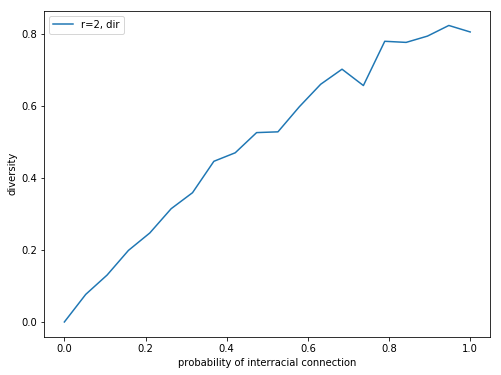

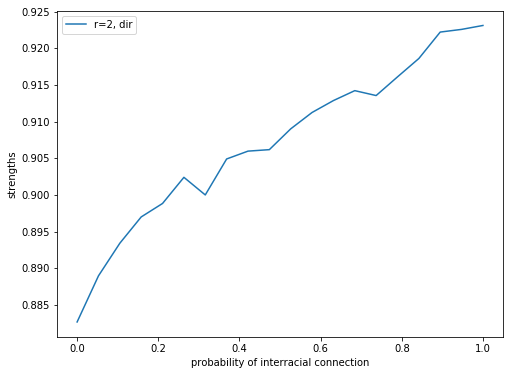

In [11]:
probabilities = np.linspace(0.0, 1.0, num=20, dtype=float)
num_sims = 50
print(probabilities)

diversities = []
strengths = []

for prob_interracial in probabilities:
    div_sum = 0.0
    str_sum = 0.0
    for _ in range(num_sims):
        div, married, strength = run_sim_bisexual_racial_diff(50, 2, 1.0, prob_interracial)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plot_measures(probabilities, diversities, strengths, x_lab='probability of interracial connection', fname="varying_interconnection")

[ 0.          0.05555556  0.11111111  0.16666667  0.22222222  0.27777778
  0.33333333  0.38888889  0.44444444  0.5       ]
[0.5, 0.5]
[0.44444444444444442, 0.55555555555555558]
[0.3888888888888889, 0.61111111111111116]
[0.33333333333333337, 0.66666666666666663]
[0.27777777777777779, 0.72222222222222221]
[0.22222222222222221, 0.77777777777777779]
[0.16666666666666669, 0.83333333333333326]
[0.11111111111111116, 0.88888888888888884]
[0.05555555555555558, 0.94444444444444442]
[0.0, 1.0]


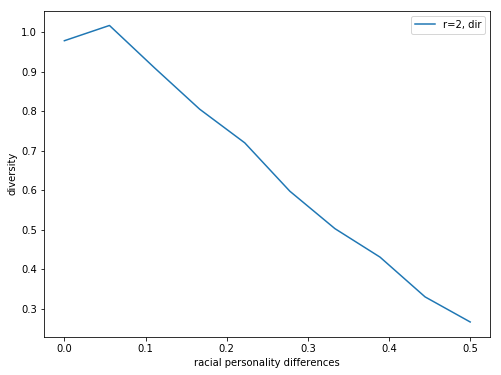

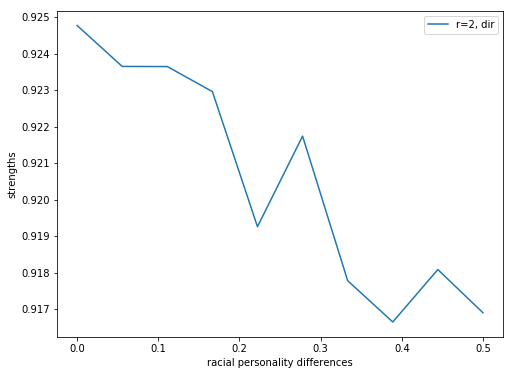

In [12]:
diffs = np.linspace(0.0, 0.5, num=10, dtype=float)
num_sims = 50
print(diffs)

diversities = []
strengths = []

for d in diffs:
    div_sum = 0.0
    str_sum = 0.0
    race_diffs = [0.5 - d, 0.5 + d]
    print(race_diffs)
    for _ in range(num_sims):
        div, married, strength = run_sim_bisexual_racial_diff(50, 2, 1.0, 1.0, race_personalities=race_diffs)
        div_sum += div
        str_sum += strength
    diversities.append(div_sum/num_sims)
    strengths.append(str_sum/num_sims)

plot_measures(diffs, diversities, strengths, x_lab='racial personality differences', fname="varying_racial_diffs")

[ 0.    0.25  0.5   0.75  1.  ]
[ 0.          0.05555556  0.11111111  0.16666667  0.22222222  0.27777778
  0.33333333  0.38888889  0.44444444  0.5       ]


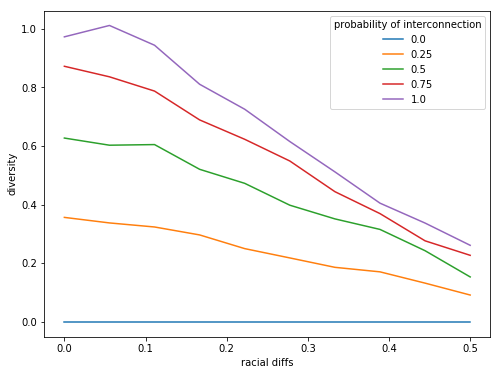

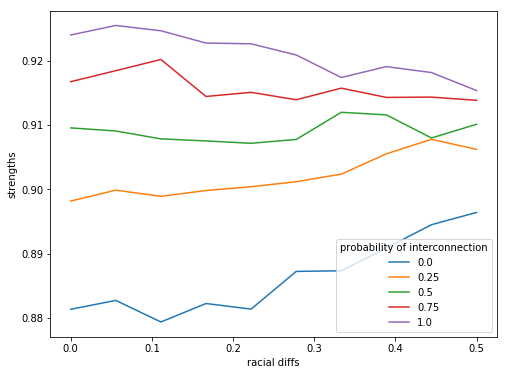

In [13]:
probabilities = np.linspace(0.0, 1.0, num=5, dtype=float)
diffs = np.linspace(0.0, 0.5, num=10, dtype=float)

num_sims = 50
print(probabilities)
print(diffs)

all_diversities = np.empty((len(probabilities), len(diffs)))
all_strengths = np.empty((len(probabilities), len(diffs)))

for i, prob_interracial in enumerate(probabilities):
    diversities = np.empty((0))
    strengths = np.empty((0))
    for d in diffs:
        div_sum = 0.0
        str_sum = 0.0
        race_diffs = [0.5 - d, 0.5 + d]
        for _ in range(num_sims):
            div, married, strength = run_sim_bisexual_racial_diff(50, 2, 1.0, prob_interracial, race_personalities=race_diffs)
            div_sum += div
            str_sum += strength
        diversities = np.append(diversities, div_sum/num_sims)
        strengths = np.append(strengths, str_sum/num_sims)
        
    all_diversities[i] = diversities
    all_strengths[i] = strengths
    
all_diffs = np.array([diffs] * len(probabilities)).T
    
plot_measures(all_diffs, all_diversities.T, all_strengths.T, x_lab = "racial diffs", labels=probabilities, legend_title="probability of interconnection", fname="varying_racialdiffs_interconnection")
